Выберите ваше любимое непрерывное распределение

Выберем [Кси квадрат](https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D1%85%D0%B8-%D0%BA%D0%B2%D0%B0%D0%B4%D1%80%D0%B0%D1%82)

In [1]:
# Импортируем необходимые библиотеки
%matplotlib inline
import math
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
from numpy.random import chisquare

# Потому что мы хотим нормальное деление
from __future__ import division

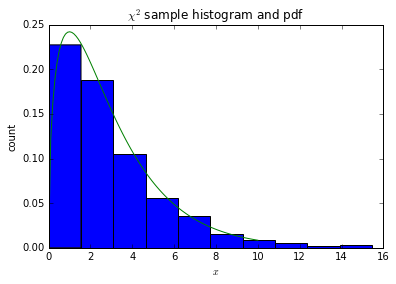

In [2]:
# Сгенерируем выборку объема 1000 
k = 3
xs = chisquare(k, 1000)

# Построим гистограмму
plt.hist(xs, normed=True)

# И плотность нашего распределения
x = np.linspace(0,10,100)
pdf = sts.chi2.pdf(x, k)
plt.plot(x, pdf)

# Подпишем оси и график
plt.title('$\chi^2$ sample histogram and pdf')
plt.ylabel('count')
plt.xlabel('$x$')

По выборке можно вычислить выборочное среднее:
$\overline{X_n} = {1\over{n}}\sum\limits_{i=1}^n{X_i}$

$\mathbb{E}[X] = k, D[X] = 2k$

$\overline{X_n} = N(\mathbb{E}[X], {D[X]\over{n}}) = N(k, {2k\over{n}})$

In [3]:
# Определим функцию, которая генерирует 1000 выборок объема n 
# и строит гистограмму распределения их выборочных средних
# и плотность соответствующего нормального распределения
# Используем для этого формулы, приведенные выше
def show_hist(n):
    ys = list(map(lambda x: sum(chisquare(k,n))/n, range(1000)))
    plt.hist(ys, normed=True)

    x = np.linspace(k-3,k+3,100)
    norm = sts.norm(loc=k, scale=math.sqrt(2*k/n))
    pdf = norm.pdf(x)
    plt.plot(x, pdf)
    plt.title('$n = {}$'.format(n))
    plt.xlabel('$\overline{X_n}$')
    plt.ylabel('count')
    plt.show()

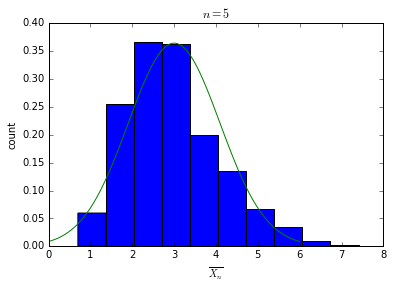

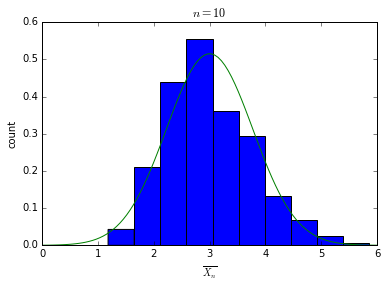

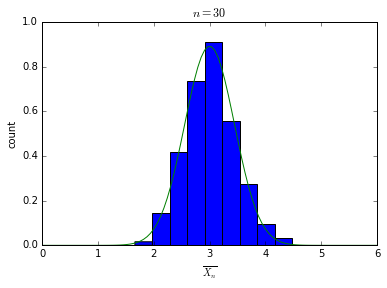

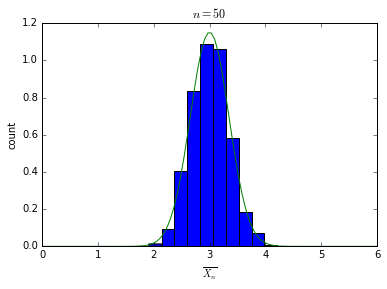

In [5]:
# Теперь запустим эту функцию на нескольких значений n
show_hist(5)
show_hist(10)
show_hist(30)
show_hist(50)

Видно, что при увеличении значения n нормальное распределение все лучше приближает наше распределение выборочных средних. Как видно из графиков, распределение хорошо приближается уже при n = 30, несмотря на то, что наше исходное распределение немного скошено.